<a href="https://colab.research.google.com/github/Elhamyali/TOPC-learning-sessions/blob/main/Learning_Session_Poll_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Key Insights

The below insights and code are based on four learning sessions in the TOPC program:

*   Systems mapping (data not available)
*   Data governance
*   User testing
*   Impact evaluation
*   Product launch

Overall, the highest level of confidence is "Analysis", followed by "Knowledge and Comprehension", and then "Application". We excluded "Evaluation" as an educational learning objective because it was only measured in one learning session.

This means that in general participants rated:

- **Very confident** in analysis; drawing connections among ideas (e.x. how user testing fits into iterating a prototype)
- **Moderately confident** in knowledge and comprehension; recognizing facts and understanding what they mean (e.x. Describe phases of user testing)
- **Moderately confident** in application; applying the facts, rules, concepts, and ideas (e.x. Model design sprint into a real-life city project)

The box plots visually represent the distribution of responses and their spread, providing insights into the overall confidence levels in each category.

# Import necessary libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Read the data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/Shareddrives/Beeck Center Shared Drive/2. Programs + Projects/1. Projects/TOPC - The Opportunity Project for Cities/Curriculum Development/Learning Sessions (Beeck Internal)/Metrics /2023 Analysis/Learning Session Poll Analysis - For Analysis.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Session Name,Confidence level,Knowledge and comprehension,Application,Analysis,Evaluation
0,Data governance,Very confident,8.0,7.0,12.0,8.0
1,NaN,Moderately confident,9.0,10.0,5.0,8.0
2,NaN,Somewhat confident,1.0,0.0,0.0,1.0
3,NaN,Not confident at all,0.0,1.0,1.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN


# Define a dictionary



In [7]:
confidence_weights = {
    'Very confident': 4,
    'Moderately confident': 3,
    'Somewhat confident': 2,
    'Not at all confident': 1,
    'Not confident at all': 1
}

print(df['Confidence level'].unique())

weighted_data = {}
summary_stats = {}

['Very confident' 'Moderately confident' 'Somewhat confident'
 'Not confident at all' nan]


# Calculate summary statistics per category

In [8]:
weighted_data = {}
summary_stats = {}

for category in df.columns[2:]:
    weighted_data[category] = []
    for i, row in df.iterrows():
        if pd.isna(row[category]):
            continue
        weight = confidence_weights[row['Confidence level']]
        count = int(row[category])
        weighted_data[category].extend([weight] * count)

    summary_stats[category] = {
        'Mean': np.mean(weighted_data[category]),
        'Median': np.median(weighted_data[category]),
        'StdDev': np.std(weighted_data[category], ddof=1),
        'Q1': np.percentile(weighted_data[category], 25),
        'Q3': np.percentile(weighted_data[category], 75),
        'Min': np.min(weighted_data[category]),
        'Max': np.max(weighted_data[category])
    }

for key, stats in summary_stats.items():
    print(f"\n{key}:")
    for stat, value in stats.items():
        print(f"{stat}: {value:.2f}")



Knowledge and comprehension:
Mean: 3.08
Median: 3.00
StdDev: 0.73
Q1: 3.00
Q3: 4.00
Min: 2.00
Max: 4.00

Application:
Mean: 3.23
Median: 3.00
StdDev: 0.70
Q1: 3.00
Q3: 4.00
Min: 1.00
Max: 4.00

Analysis:
Mean: 3.40
Median: 3.50
StdDev: 0.71
Q1: 3.00
Q3: 4.00
Min: 1.00
Max: 4.00

Evaluation:
Mean: 3.28
Median: 3.00
StdDev: 0.83
Q1: 3.00
Q3: 4.00
Min: 1.00
Max: 4.00


# Create box plots of confidence levels across educational learning objectives

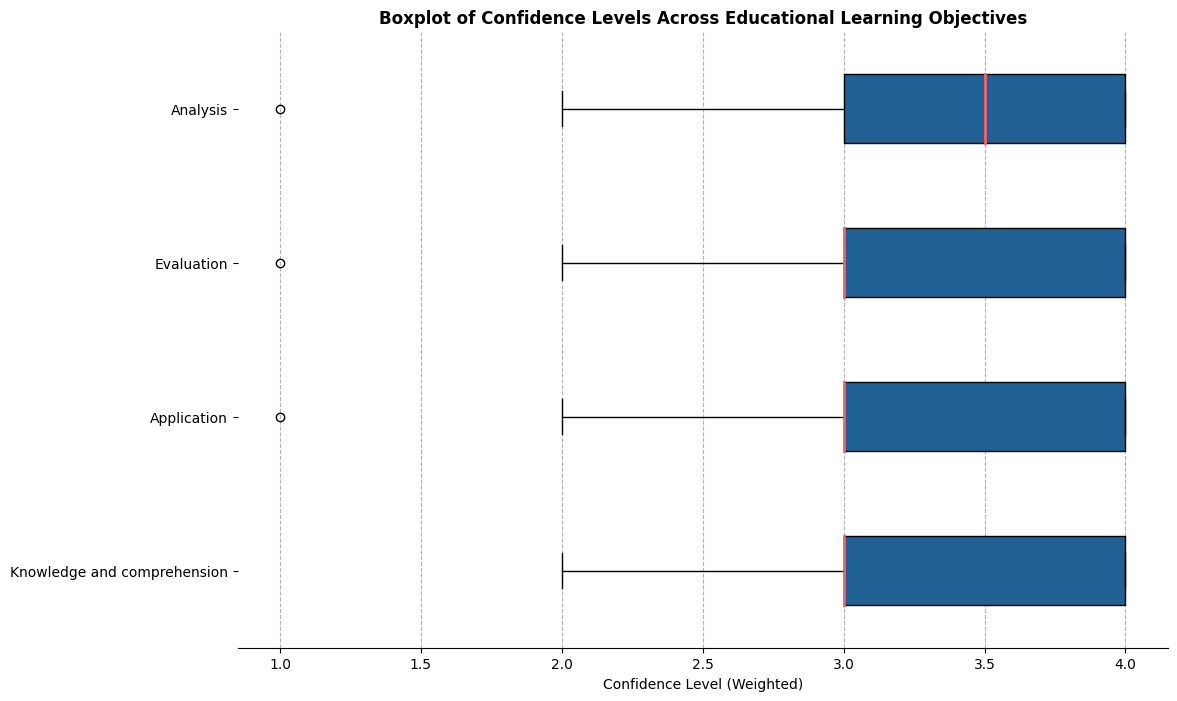

In [9]:
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Open Sans'] + rcParams['font.sans-serif']

sorted_keys = sorted(weighted_data.keys(), key=lambda x: np.median(weighted_data[x]))
sorted_data = [weighted_data[key] for key in sorted_keys]

plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

bp = plt.boxplot(sorted_data, vert=False, patch_artist=True, labels=None)
ax.set_yticklabels(sorted_keys)

for patch, median in zip(bp['boxes'], bp['medians']):
    patch.set_facecolor('#206095')
    median.set(color='#F66068', linewidth=2)

plt.title('Boxplot of Confidence Levels Across Educational Learning Objectives', fontweight='bold')

ax.xaxis.grid(True, linestyle='--', which='major', color='#B3B3B3', alpha=1.0)
ax.yaxis.grid(False)

plt.xlabel('Confidence Level (Weighted)')
plt.show()